In [1]:
import torch as tr
import numpy as np
from CSW import *

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
def load_ysm(blocklen,bpmode):
  fname = 'ysm-blocklen%i-bpmode_%s.npy'%(blocklen,bpmode)
  fpath = 'eval_data/matchSEM/'+fname
  return np.load(fpath)

def load_acc(blocklen,bpmode):
  fname = 'acc-blocklen%i-bpmode_%s.npy'%(blocklen,bpmode)
  fpath = 'eval_data/matchSEM/'+fname
  return np.load(fpath)


### plot accuracy (human/SEM match)

In [3]:
bpmode = 'scene'
acc_blck = load_acc(40,bpmode)
acc_intr = load_acc(1,bpmode)

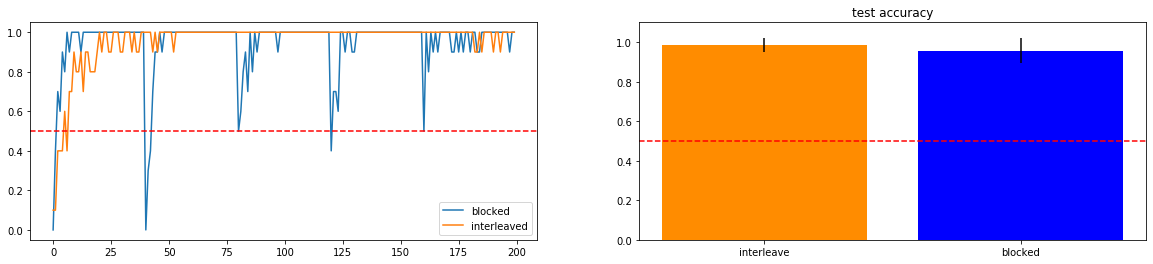

In [4]:
fig,axarr = plt.subplots(1,2,figsize=(20,4))
ax = axarr[0]
ax.plot(acc_blck.mean(0),label='blocked')
ax.plot(acc_intr.mean(0),label='interleaved')
ax.legend()
ax.axhline(0.5,c='r',ls='--')

ax = axarr[1]
acc_testM = [acc_intr[:,160:].mean(),acc_blck[:,160:].mean()]
acc_testS = np.array([acc_intr[:,160:].std(),acc_blck[:,160:].std()])/np.sqrt(len(acc_intr))
ax.bar([0,1],acc_testM,yerr=acc_testS,color=['darkorange','blue'])
ax.set_ylim(0,1.1)
ax.set_xticks([0,1])
ax.set_xticklabels(['interleave','blocked'])
ax.set_title('test accuracy')

ax.axhline(0.5,c='r',ls='--')

plt.savefig('figures/matchSEM/acc-%s'%bpmode)

### plot softmax

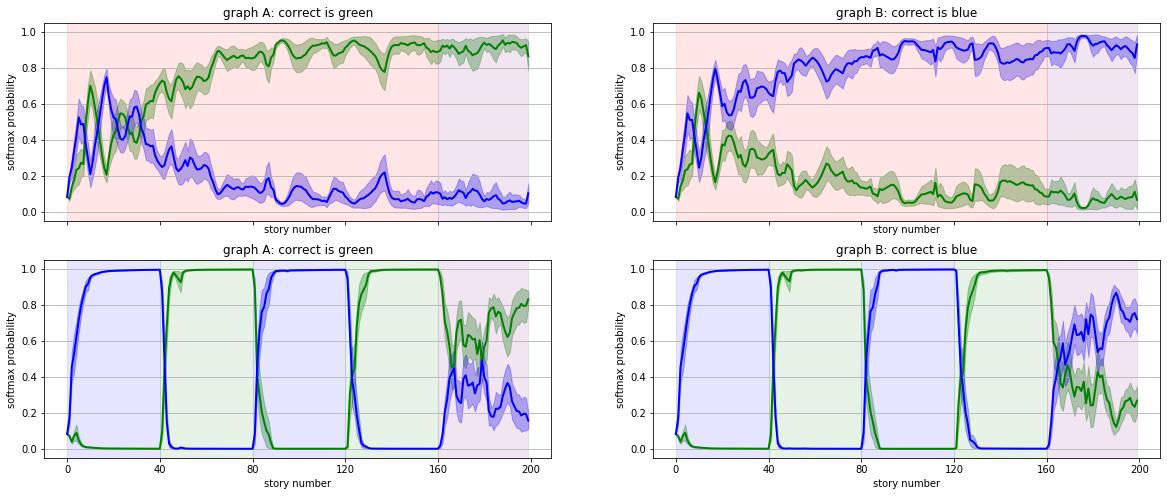

In [6]:
tstep = 2
nodes = (3,4)
cL=['g','b']
labL = ['left','right']
tL = ['graph A: correct is green','graph B: correct is blue']

fig,axarr = plt.subplots(2,2,figsize=(20,8),sharex=True)

for cond_idx,blocklen in enumerate([1,40]):
  ysm = load_ysm(blocklen,bpmode)
  ysmM = ysm.mean(0)
  ysmS = ysm.std(0)/np.sqrt(len(ysm))
  for graphid in range(2):
    ax = axarr[cond_idx,graphid]
    ysmM_plt = ysmM[graphid,:,tstep,nodes]
    ysmS_plt = ysmS[graphid,:,tstep,nodes]

    for idx,(M,S) in enumerate(zip(ysmM_plt,ysmS_plt)):
      ax.plot(M,lw=2,c=cL[idx],label=labL[idx])
      ax.fill_between(range(200),M-S,M+S,color=cL[idx],alpha=.3,)
      ax.set_ylim(-.05,1.05)

    if blocklen==40:
      for b in range(4):
        ax.fill_between(range(b*40,(b*40)+41),-0.05,1.05,color=cL[(1+b)%2],alpha=.1)
    else:
      ax.fill_between(range(0,161),-0.05,1.05,color='r',alpha=.1)
    ax.fill_between(range(160,200),-0.05,1.05,color='purple',alpha=.1)
    ax.grid(axis='y')
    ax.set_ylabel('softmax probability')
    ax.set_xlabel('story number')
    ax.set_xticks(range(0,201,40))
    ax.set_title(tL[graphid])
  # plt.savefig('figures/human_match_eval_blocklen%i.svg'%blocklen,format='svg')
plt.savefig('figures/matchSEM/ysm-%s'%bpmode)